In [21]:
import pandas as pd

In [22]:
'''
prices_round_1_day_-1.csv
trades_round_1_day_-1.csv
'''

prices = pd.concat([pd.read_csv(f'round1/prices_round_1_day_{i}.csv', sep=';') for i in range(-2, 1)], ignore_index=True)
trades = pd.concat([pd.read_csv(f'round1/trades_round_1_day_{i}_nn.csv', sep=';') for i in range(-2, 1)], ignore_index=True)

In [23]:
ink = prices[prices['product'] == 'SQUID_INK']
ink

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
2,-2,0,SQUID_INK,1998,26,NaN,NaN,NaN,NaN,2002,26,NaN,NaN,NaN,NaN,2000.0,0.0
3,-2,100,SQUID_INK,1999,5,1998.0,26.0,NaN,NaN,2001,20,NaN,NaN,NaN,NaN,2000.0,0.0
7,-2,200,SQUID_INK,1997,31,NaN,NaN,NaN,NaN,2000,1,2001.0,30.0,NaN,NaN,1998.5,0.0
11,-2,300,SQUID_INK,1997,27,NaN,NaN,NaN,NaN,2000,27,NaN,NaN,NaN,NaN,1998.5,0.0
14,-2,400,SQUID_INK,1996,20,NaN,NaN,NaN,NaN,2000,20,NaN,NaN,NaN,NaN,1998.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89986,0,999500,SQUID_INK,1830,28,NaN,NaN,NaN,NaN,1833,28,NaN,NaN,NaN,NaN,1831.5,0.0
89989,0,999600,SQUID_INK,1832,7,1831.0,29.0,NaN,NaN,1834,2,1835.0,27.0,NaN,NaN,1833.0,0.0
89993,0,999700,SQUID_INK,1834,1,1832.0,26.0,NaN,NaN,1835,26,NaN,NaN,NaN,NaN,1834.5,0.0
89994,0,999800,SQUID_INK,1837,27,NaN,NaN,NaN,NaN,1839,1,1840.0,27.0,NaN,NaN,1838.0,0.0


In [24]:
ink_trades = trades[trades['symbol'] == 'SQUID_INK']

In [25]:
ink_trades

,timestamp,buyer,seller,symbol,currency,price,quantity
3,0,NaN,NaN,SQUID_INK,SEASHELLS,2002.0,1
5,100,NaN,NaN,SQUID_INK,SEASHELLS,2001.0,6
7,1000,NaN,NaN,SQUID_INK,SEASHELLS,1999.0,10
9,1100,NaN,NaN,SQUID_INK,SEASHELLS,1999.0,1
12,1500,NaN,NaN,SQUID_INK,SEASHELLS,2000.0,1
...,...,...,...,...,...,...,...
24875,998500,NaN,NaN,SQUID_INK,SEASHELLS,1840.0,10
24877,998700,NaN,NaN,SQUID_INK,SEASHELLS,1840.0,1
24880,998800,NaN,NaN,SQUID_INK,SEASHELLS,1831.0,1
24883,999500,NaN,NaN,SQUID_INK,SEASHELLS,1830.0,2


2        2000.0
3        2000.0
7        1998.5
11       1998.5
14       1998.0
          ...  
89986    1831.5
89989    1833.0
89993    1834.5
89994    1838.0
89998    1839.5
Name: mid_price, Length: 30000, dtype: float64

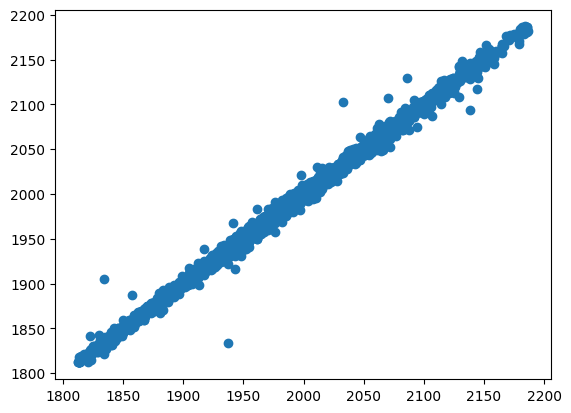

In [26]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(ink_trades['price'], ink_trades['price'].shift(-1))

ink['mid_price']

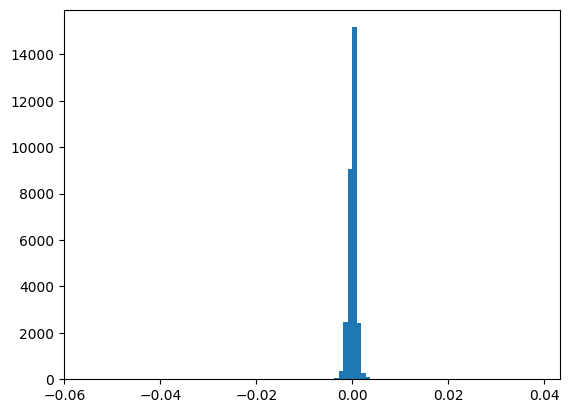

In [27]:
ink_returns = ink['mid_price'].pct_change()
ink_log_returns = np.log(ink['mid_price'] / ink['mid_price'].shift(1))
plt.hist(ink_log_returns.dropna(), bins=100)
plt.show()

In [28]:
ink_trades

,timestamp,buyer,seller,symbol,currency,price,quantity
3,0,NaN,NaN,SQUID_INK,SEASHELLS,2002.0,1
5,100,NaN,NaN,SQUID_INK,SEASHELLS,2001.0,6
7,1000,NaN,NaN,SQUID_INK,SEASHELLS,1999.0,10
9,1100,NaN,NaN,SQUID_INK,SEASHELLS,1999.0,1
12,1500,NaN,NaN,SQUID_INK,SEASHELLS,2000.0,1
...,...,...,...,...,...,...,...
24875,998500,NaN,NaN,SQUID_INK,SEASHELLS,1840.0,10
24877,998700,NaN,NaN,SQUID_INK,SEASHELLS,1840.0,1
24880,998800,NaN,NaN,SQUID_INK,SEASHELLS,1831.0,1
24883,999500,NaN,NaN,SQUID_INK,SEASHELLS,1830.0,2


In [ ]:
# plot ink trade volume in t-1 timestamp against ink return from t to t+1

In [37]:
ink_returns = ink[['timestamp', 'mid_price']].copy()
ink_returns['pct_change'] = ink_returns['mid_price'].pct_change()

In [38]:
ink_returns

,timestamp,mid_price,pct_change
2,0,2000.0,NaN
3,100,2000.0,0.000000
7,200,1998.5,-0.000750
11,300,1998.5,0.000000
14,400,1998.0,-0.000250
...,...,...,...
89986,999500,1831.5,0.000546
89989,999600,1833.0,0.000819
89993,999700,1834.5,0.000818
89994,999800,1838.0,0.001908


In [51]:
ink_trades.groupby('timestamp')['quantity'].max()
ink_trades.groupby('timestamp')['quantity'].sum()

# create a new dataframe with summed ink trade volume and max ink trade volume per timestamp
ink_trade_vol = ink_trades.groupby('timestamp')['quantity'].agg(['sum', 'max']).reset_index()
ink_trade_vol['timestamp'] += 100
ink_trade_vol = ink_trade_vol.rename(columns={'sum': 'last_trade_volume_sum', 'max': 'last_trade_volume_max'})

In [52]:
ink_returns = ink_returns.merge(ink_trade_vol, on='timestamp', how='left')

In [55]:
ink_returns['last_trade_volume_sum']

0         NaN
1        15.0
2         6.0
3         NaN
4         6.0
         ... 
29995     1.0
29996     4.0
29997     1.0
29998     NaN
29999     NaN
Name: last_trade_volume_sum, Length: 30000, dtype: float64

In [59]:
from plotly import express as px

px.scatter(ink_returns, x='last_trade_volume_sum', y='pct_change')

In [60]:
px.scatter(ink_returns, x='last_trade_volume_max', y='pct_change')